In [78]:
'''

--QRAM with 2 addresses whic stores 4 datapoints [logn->n mapping]
--For QRAM theory please check this link: https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/main/exercises/week-2/ex_2b_en.ipynb
--Data stored is a 9 bit value

'''

'\n\n--QRAM with 2 addresses whic stores 4 datapoints [logn->n mapping]\n--For QRAM theory please check this link: https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/main/exercises/week-2/ex_2b_en.ipynb\n--Data stored is a 9 bit value\n\n'

In [79]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
print("Imports Successful")

Imports Successful


In [80]:
'''
Data which is being mapped. Datapoints are 9 bit values stored in a 2d array ([[data0],[data1],
[data2],[data3]])
'''

lightout4=[[1, 1, 1, 0, 0, 0, 1, 0, 0],[1, 0, 1, 0, 0, 0, 1, 1, 0],[1, 0, 1, 1, 1, 1, 0, 0, 1],[1, 0, 0, 0, 0, 0, 1, 0, 0]]

In [81]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
address = QuantumRegister(2)
tile = QuantumRegister(9)
result = ClassicalRegister(11)

qc = QuantumCircuit(address,tile,result)

#Initialize
qc.h([address[0],address[1]])

#QRAM for 4 datapoints

for i in range(0,4):
    if i==0:
        qc.x([address[0],address[1]])
        j=0
        for j in range(0,9):
            if lightout4[i][j]==1:
                 qc.ccx(address[0],address[1],tile[j])

        qc.x([address[0],address[1]])
        qc.barrier()

    elif i==1:
        qc.x(address[0])
        j=0
        for j in range(0,9):
            if lightout4[i][j]==1:
                 qc.ccx(address[0],address[1],tile[j])

        qc.x(address[0])
        qc.barrier()

    elif i==2:
        qc.x(address[1])
        j=0
        for j in range(0,9):
            if lightout4[i][j]==1:
                 qc.ccx(address[0],address[1],tile[j])

        qc.x(address[1])
        qc.barrier()

    elif i==3:
        j=0
        for j in range(0,9):
            if lightout4[i][j]==1:
                 qc.ccx(address[0],address[1],tile[j])
        qc.barrier()
    
#Measure the address 
qc.measure(address[0:2], result[0:2])
qc.barrier()  

#Checking QRAM Data
qc.measure(address[0:2], result[0:2])
qc.measure(tile[0:9],result[2:11])


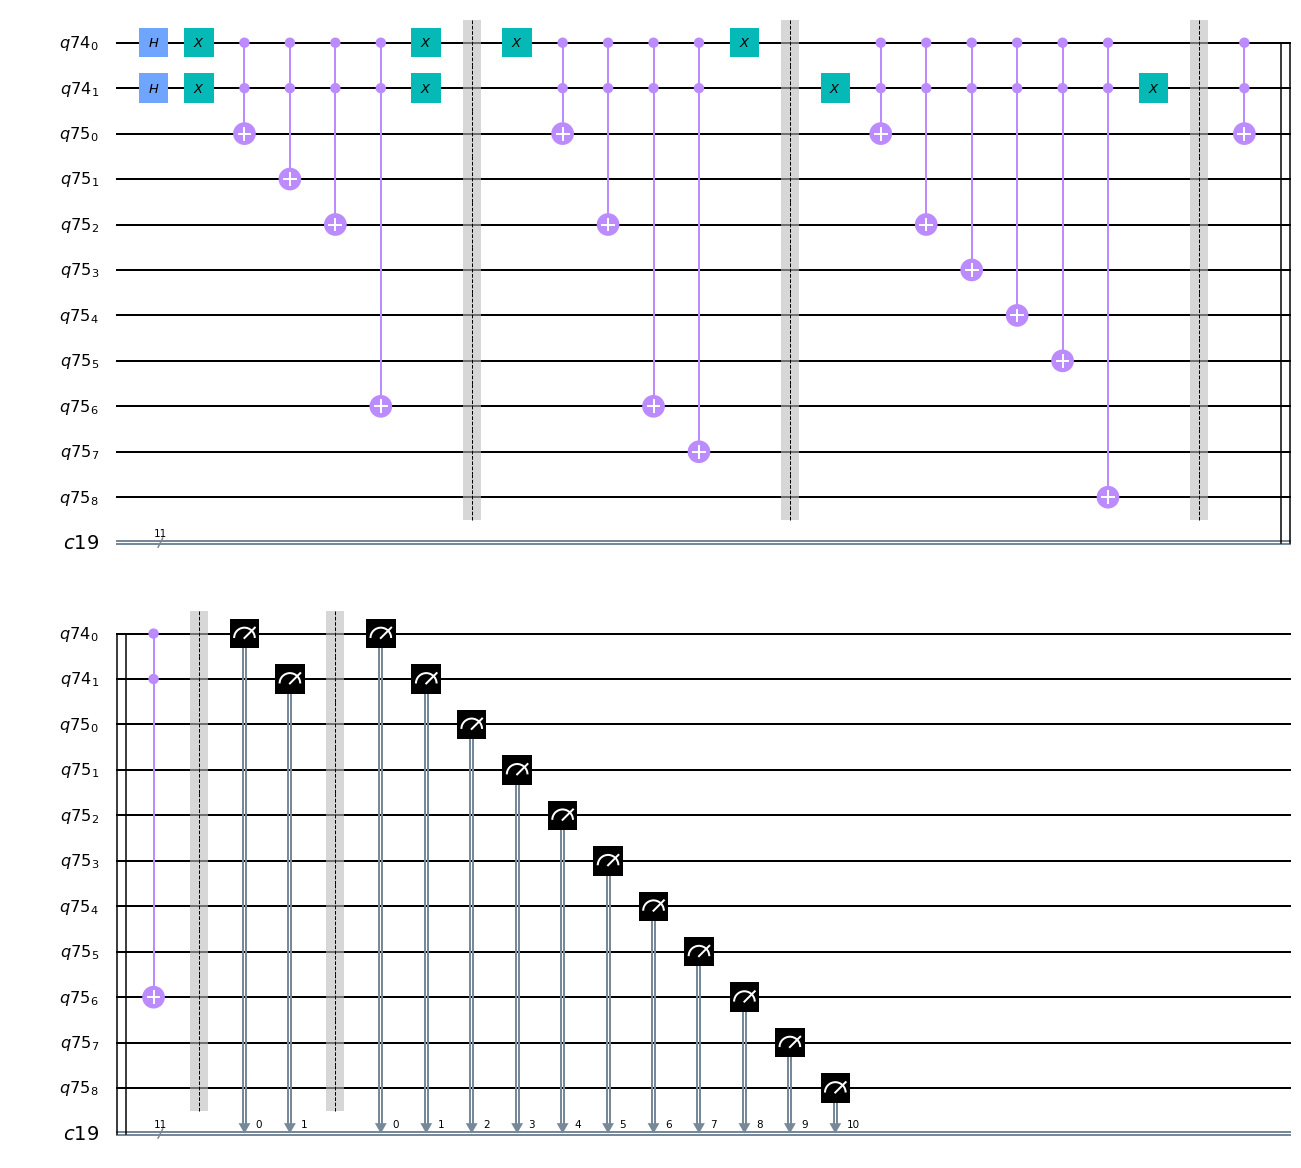

In [82]:
#Draw Circuit Diagram
qc.draw(output="mpl")

In [83]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count =result.get_counts()
print(count)

{'00100000111': 2017, '10011110101': 1990, '00100011100': 2023, '01100010110': 1970}


In [84]:
'''
This circuit measurement returns the last 2 bits as addresses in superposition (00, 01, 10, 11)
and the remaining 9 bits as the data mapped by the Qram in superposition (Please read bits in 
reverse order)

'''

'\nThis circuit measurement returns the last 2 bits as addresses in superposition (00, 01, 10, 11)\nand the remaining 9 bits as the data mapped by the Qram in superposition\n\n'

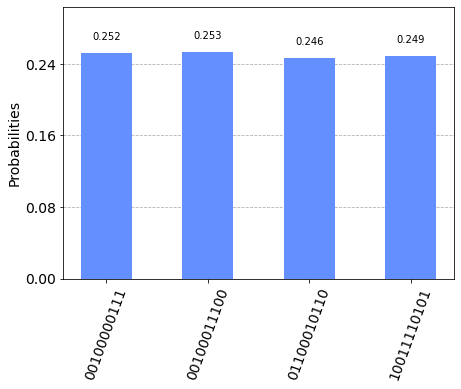

In [85]:
#Histogram Plot
plot_histogram(count)